In [ ]:
!pwd

In [2]:
import glob2 as glob
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import pickle

paths = glob.glob('../data/fonts/*.ttf')
print(paths[:10])

['../data/fonts/ADAMSFONT.ttf', '../data/fonts/OMGWriteLikeWilliam.ttf', '../data/fonts/fourHand_TRIAL.ttf', '../data/fonts/Glenns Hand.ttf', '../data/fonts/tough_dog.ttf', '../data/fonts/Vintlys_Hand.ttf', '../data/fonts/Nebbulla.ttf', '../data/fonts/seminggu_di_kota_cianjur.ttf', '../data/fonts/Barely_Handwritten.ttf', '../data/fonts/Handwriting.ttf']


In [8]:
#fonts that we should ignore: ones that we have rejected via oompa loompa work,
#and ones that we have selected via oompa loompa work
ignored_fonts = pickle.load(open('../data/fonts/handwritten_1_to_738.p', 'rb'))
more_ignored_fonts = pickle.load(open('../data/fonts/handwritten_738_to_757.p', 'rb'))
#rejections from liz 
rejected_fonts = pickle.load(open('../data/fonts/rejections_from_liz.p', 'rb'))
#selections from liz
selected_fonts = pickle.load(open('../data/fonts/handwritten_from_liz.p','rb'))


In [9]:

ignored_paths = []
for i in selected_fonts:
    path = f'../data/fonts/{i}.ttf'
    ignored_paths.append(path)
for i in more_ignored_fonts:
    path = f'../data/fonts/{i}.ttf'
    ignored_paths.append(path)
for i in rejected_fonts:
    path = f'../data/fonts/{i}.ttf'
    ignored_paths.append(path)
for i in selected_fonts:
    path = f'../data/fonts/{i}.ttf'
    ignored_paths.append(path)

In [11]:
# create a 'set' object on the ignored paths and on the big path list
ignored_paths = set(ignored_paths)
paths_copy = paths.copy()
paths_copy = set(paths_copy)
print(len(paths_copy))
print(len(ignored_paths))

4477
1072


In [13]:
#paths that we still haven't done oompa loompa work on
paths = paths_copy - ignored_paths
print(len(paths))
paths = list(paths)

3413


In [24]:
import ipywidgets as widgets
from IPython.display import display, clear_output

class Cycler:
    
    def __init__(self, paths):
        self.paths = paths
        self.handwritten = []
        self.not_handwritten = []
        self.yes_button = widgets.Button(description="Yes!")
        self.yes_button.on_click(self.on_yes_clicked)
        self.no_button = widgets.Button(description="No")
        self.no_button.on_click(self.on_no_clicked)
        self.generator = None
        self.last_font = None
    
    def font_generator(self):
        ''' This is a generator that always takes one font and 
        displays its writing style for a predetermined text.
        '''
        for idx, font_name in enumerate(self.paths):
            try:
                fnt = ImageFont.truetype(self.paths[idx], 100)
                img = Image.new('RGB', (2500, 150), color = 'white')
                d = ImageDraw.Draw(img)
                d.text((10,10), "The quick brown fox jumps over the lazy dog",
                       font=fnt, fill=(0, 0, 0))

                plt.figure(figsize = (30,3))
                plt.imshow(img)

                temp = font_name.split("/")[-1].split(".")[0]
                #img.save(f'../data/example{temp}.png')
                yield temp 

            except:
                yield "failed"
    
    def initiate_generator(self):
        self.generator = self.font_generator()
        
        print("The generator has been initiated! Click button to start.")
        
        display(self.yes_button)
        display(self.no_button)
        return None
    
    def on_yes_clicked(self, b):
        clear_output()
        
        if(self.last_font!=None):
            self.handwritten.append(self.last_font)
                
        display(self.yes_button)
        display(self.no_button)
        self.last_font = next(self.generator)
        
        print(self.last_font)
        print(cycler.handwritten)
        return None
    
    def on_no_clicked(self, b):
        clear_output()
        
        if(self.last_font!=None):
            self.not_handwritten.append(self.last_font)
        
        display(self.yes_button)
        display(self.no_button)
        self.last_font = next(self.generator)
        
        print(self.last_font)
        print(cycler.handwritten)
        return None


Button(description='Yes!', style=ButtonStyle())

Button(description='No', style=ButtonStyle())

Danv2
['Heather Shibahn', 'Jake and Abby', 'Quincy Egbert', 'Simplesnails ver 4', 'Taras_Handwriting_2', 'SchoolFont', 'de Manu 1 NormalItalic', 'Better Signature Font', 'Chips & Salsa', 'i eat crayons', 'Aji_Hand', 'Font linda', 'Wilson Hand', 'the TOADFROG', 'Surrendered Heart', 'CRAE', 'Harrison', 'Sweetly Broken', 'MollyWolly', 'JoshCooper', 'Star King Personal Use', 'TalkingToTheMoon', 'CoralSkittles', 'Fowler', 'morena', 'Cattalleya Demo', 'Barthilda', 'thors thunderfont', 'lanara script-demo', 'SuperAwesome', 'Dani-Regular', 'LittleSparrow', 'BenBrousseau', 'I_NEED_HELP', 'Notera2Light_PERSONAL', 'Flyknit', 'Better Together Demo', 'JustBecause-PersonalUse', 'AngelinaHandwriting', 'Winchester', 'HyperPunchPink', 'Dhanikans Signature 2_dafont', 'fattypants', 'BreakfastAndChillDEMO', 'MarkerScript', 'CEF', 'BandsMakeHerDance', 'signarita_louisse_thin', 'NotDot', 'TamoroScript_PersonalUseOnly', 'Aida Garmo - Scrap Rounded', 'TingTong', 'DJB THE CHEERLEADER', 'Sixth Kristen Squirt', 

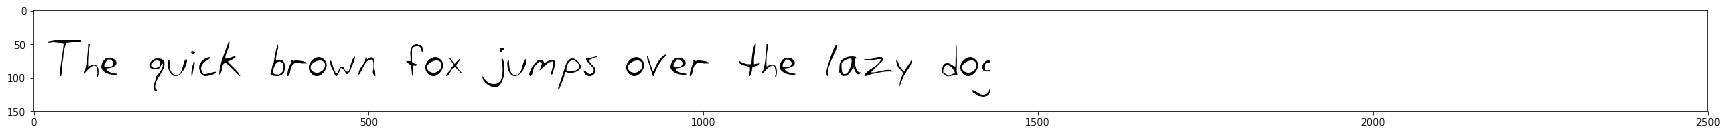

In [25]:
cycler = Cycler(paths)
cycler.initiate_generator()


In [17]:
import pickle
index_classified = len(cycler.handwritten) + len(cycler.not_handwritten) + index
pickle.dump(cycler.handwritten,open( f"../data/fonts/handwritten_{index}_to_{index_classified}.p", "wb" ))

In [11]:
def font_generator(paths=paths):
    ''' This is a generator that always takes one font and 
    displays its writing style for a predetermined text.
    '''
    for idx, font_name in enumerate(paths):

        temp = font_name.split("/")[-1].split(".")[0]
        yield temp 

In [12]:
something = list(font_generator(paths))

In [13]:
print(something.index('You Me And Coffee'))
print(len(cycler.handwritten))

0
10


In [26]:
liz_selected_paths = cycler.handwritten

In [28]:
liz_selected_paths[-1]

'Lefty Dave'

In [29]:
pickle.dump(cycler.handwritten,open( f"../data/fonts/handwritten_from_liz.p", "wb" ))

In [30]:
len(liz_selected_paths)

645

In [31]:
liz_not_selected_paths = cycler.not_handwritten

In [32]:
pickle.dump(cycler.not_handwritten,open( f"../data/fonts/rejections_from_liz.p", "wb" ))